# Liberalism of Austrians

To answer this question, we use **EVS 1990-2018 Austrian data (SUF edition)** from Kritzinger, Sylvia; Aichholzer, Julian; Glavanovits, Josef; Hajdinjak, Sanja; Klaiber, Judith; Seewann, Lena; Friesl, Christian; Zulehner, Paul M., 2019, "European Values Study 1990-2018 Austria Longitudinal Data (SUF edition)", https://doi.org/10.11587/C4YBOT, AUSSDA, V1, UNF:6:AxP/dfTpO2hObtNvNy/JiQ== [fileUNF].

We download the dataset and upload it to Google Colab into a new folder called data.

Bet before we download the data, let us configure teh session (i.e. load the required packages)

In [18]:
# install management tool to make sure that all packages are always loaded
install.packages("pacman")

library(pacman)

p_load(tidyverse, # data manipulation and visualisation
       ggplot2,
       haven,
      showtext, # using non-standard font in R graphs
      ggtext, # coloring title in plots
      sjlabelled, # using SPSS datasets with its labels
      MASS, # for statistical analysis and user-friendly export of models
      tidymodels) # for statistical analysis and user-friendly exports of models

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Let us now load the dataset and have a look at the variables

In [6]:
# loading the dataset with the read_dta function
df_evs <- read_dta("/content/data/10048_da_en_v1_0-1.dta")

# print the first 10 lines of the dataset
head(df_evs)

version,doi,A001,A002,A003,A004,A005,A006,A008,A009,⋯,v211,v224,v239_r,v239b,v241,v243,v249,v263,v266,weight_cs
<chr>,<chr>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,⋯,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl>
1.0 (2019-07-15),doi:10.11587/C4YBOT,1,1,2,2,1,3,2,NA(a),⋯,NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),1.25100
1.0 (2019-07-15),doi:10.11587/C4YBOT,1,2,3,3,2,2,1,1,⋯,1,3,0,0,NA(a),6,2,6,5,0.17589
1.0 (2019-07-15),doi:10.11587/C4YBOT,2,1,2,4,1,3,1,NA(a),⋯,NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),0.90500
1.0 (2019-07-15),doi:10.11587/C4YBOT,2,1,1,3,3,4,NA(a),NA(a),⋯,NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),1.17100
1.0 (2019-07-15),doi:10.11587/C4YBOT,2,1,2,3,1,3,2,1,⋯,NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),1.51400
1.0 (2019-07-15),doi:10.11587/C4YBOT,1,1,1,3,2,3,2,2,⋯,NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),NA(a),0.73400


By looking

In [8]:
df <- df_evs |> dplyr::select(
  year=S002EVS,
  sex=X001,
  homo=F118
)

print(df)

# A tibble: 6,440 × 3
   year      sex        homo                   
   <dbl+lbl> <dbl+lbl>  <dbl+lbl>              
 1 3 [1999]  1 [Male]   10 [Always justifiable]
 2 5 [2018]  2 [Female]  6 [6]                 
 3 3 [1999]  1 [Male]   10 [Always justifiable]
 4 3 [1999]  2 [Female] 10 [Always justifiable]
 5 2 [1990]  2 [Female]  3 [3]                 
 6 4 [2008]  2 [Female]  3 [3]                 
 7 4 [2008]  1 [Male]    1 [Never justifiable] 
 8 3 [1999]  2 [Female]  7 [7]                 
 9 2 [1990]  1 [Male]   10 [Always justifiable]
10 4 [2008]  2 [Female] 10 [Always justifiable]
# ℹ 6,430 more rows


Let's run some regression homo ~ sex + year

In [9]:
lm_fit <- lm(homo ~ year + sex, data=df)

summary(lm_fit)


Call:
lm(formula = homo ~ year + sex, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8907 -2.8561 -0.2757  3.1093  6.7474 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.62599    0.19419   3.224  0.00127 ** 
year         1.01155    0.03629  27.870  < 2e-16 ***
sex          0.60348    0.08359   7.219 5.85e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.252 on 6172 degrees of freedom
  (265 observations deleted due to missingness)
Multiple R-squared:  0.1161,	Adjusted R-squared:  0.1158 
F-statistic: 405.4 on 2 and 6172 DF,  p-value: < 2.2e-16


Let's have more beautiful results

In [10]:
tidy(lm_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.6259851,0.19419140,3.223547,1.272721e-03
year,1.0115536,0.03629479,27.870488,4.069891e-161
sex,0.6034845,0.08359273,7.219343,5.852297e-13


Plot relationship

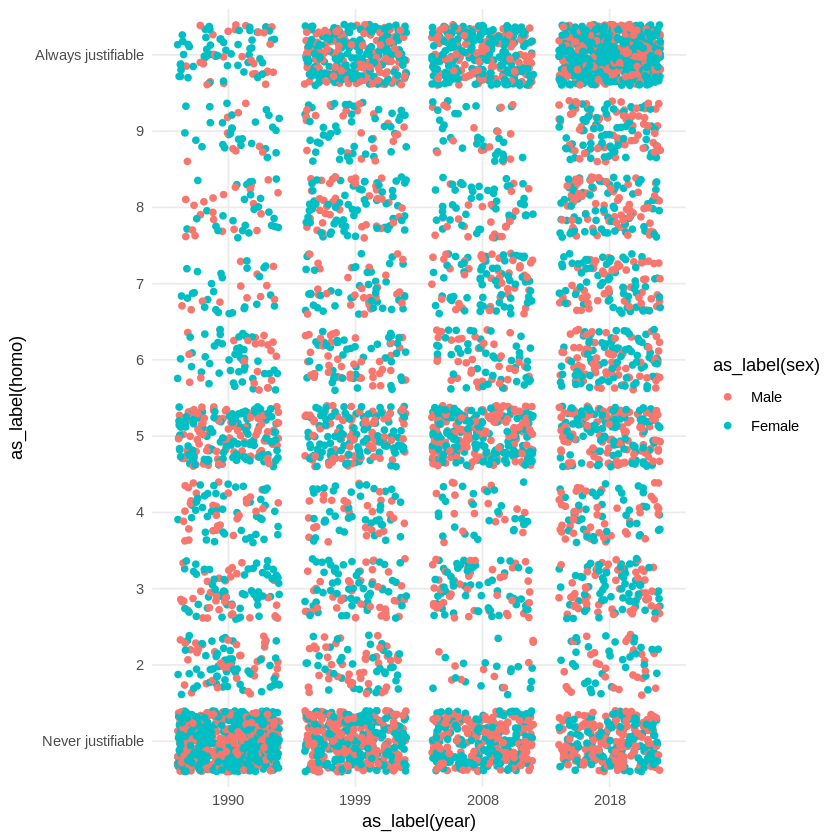

In [23]:
p <- df |> filter(!is.na(homo)) |> # filter NAs
  group_by(sex, year) |> # group by variables
  # plot year on x- and homosexuality on y-axis; use as_label function so that ggplot2  can handle spss/stat data
  ggplot(aes(as_label(year), as_label(homo), color = as_label(sex))) +
    geom_jitter() + # use geom_jitter to show all data points; prevents overplotting
    theme_minimal()

p

Let's save the plot

In [24]:
png(filename = "plots/plot_homosexuality.png",
width = 21.1,
height = 10.2,
units = "in",
res = 300,
bg = "#ffffff"
)

p

dev.off()

pdf 
  2